In [1]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [2]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW_OzESI

## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [3]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [4]:
name_of_project = 'canola'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/canola/o3on' and 'Projects/canola/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [5]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'canola'
Project_Folder_data = Project + Project_Name + '/mzml/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'canola'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW_OzESI.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: canola
Project_Folder_data: ./Projects/canola/mzml/
Project_results: ./Projects/canola/results/
file_name_to_save: canola
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [6]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW_OzESI.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [7]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW_OzESI.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=True)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW_OzESI.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW_OzESI.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW_OzESI.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Finished parsing mzML file: ./Projects/canola/mzml/CrudeCanola_O3on_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml/DegummedCanola_O3on_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml/RBDCanola_O3on_150gN3_02082023.mzML

Finished parsing all mzML files



In [8]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,5.451378e+05,NaN,760.6,571.596,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.596
1,NaN,6.208219e+05,NaN,762.6,573.596,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.596
2,NaN,9.441859e+05,NaN,764.6,575.596,CrudeCanola_O3on_150gN3_02082023,764.6 -> 575.596
3,NaN,1.137434e+06,NaN,766.7,577.596,CrudeCanola_O3on_150gN3_02082023,766.7 -> 577.596
4,NaN,5.900676e+05,NaN,782.6,593.596,CrudeCanola_O3on_150gN3_02082023,782.6 -> 593.596
...,...,...,...,...,...,...,...
100,TAG,4.897507e+05,[TG(54:6)]_FA18:1,896.8,597.596,RBDCanola_O3on_150gN3_02082023,896.8 -> 597.596
101,TAG,1.179904e+06,[TG(54:5)]_FA18:1,898.8,599.596,RBDCanola_O3on_150gN3_02082023,898.8 -> 599.596
102,TAG,1.654774e+06,"[TG(55:11),TG(54:4)]_FA18:1",900.8,601.596,RBDCanola_O3on_150gN3_02082023,900.8 -> 601.596
103,TAG,5.234119e+06,"[TG(55:10),TG(54:3)]_FA18:1",902.8,603.596,RBDCanola_O3on_150gN3_02082023,902.8 -> 603.596


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [9]:
mrm_database = CLAW_OzESI.read_mrm_list(data_base_name_location, deuterated=False)
df_OzESI_matched = CLAW_OzESI.match_lipids_parser(mrm_database, df_OzESI, tolerance)


/home/iyer95/CLAW/CLAW/lipid_platform/CLAW_OzESI.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW_OzESI.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW_OzESI.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

### Confirm OzESI df before parsing data

In [10]:
df_OzESI_matched

,Class,Lipid,OzESI_Intensity,Parent_Ion,Product_Ion,Retention_Time,Sample_ID,Transition
0,NaN,NaN,190.400009,760.6,571.596,0.015933,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.596
1,NaN,NaN,147.420013,760.6,571.596,0.032233,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.596
2,NaN,NaN,153.620010,760.6,571.596,0.048550,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.596
3,NaN,NaN,200.080017,760.6,571.596,0.064850,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.596
4,NaN,NaN,206.900009,760.6,571.596,0.081167,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.596
...,...,...,...,...,...,...,...,...
225352,TAG,"[TG(55:9),TG(54:2)]_FA18:1",148.500015,904.8,605.596,34.931700,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.596
225353,TAG,"[TG(55:9),TG(54:2)]_FA18:1",131.800003,904.8,605.596,34.948000,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.596
225354,TAG,"[TG(55:9),TG(54:2)]_FA18:1",151.960007,904.8,605.596,34.964317,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.596
225355,TAG,"[TG(55:9),TG(54:2)]_FA18:1",137.700012,904.8,605.596,34.980617,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.596


### Main Processing Section - Lipidomics Data Processing and Double-Bond Location Analysis

The code block initiates the data refining process by filtering the retention time from the `df_oz_matched` DataFrame using the `filter_rt()` function and concatenating this DataFrame with `df_matched` via `concat_dataframes()`. The resulting DataFrame is then enriched by adding the positional isomers and lipid information for specified double bond positions (here, 7, 9, 12) through the `DB_Position_df()` and `add_lipid_info()` functions respectively. Following sorting by 'Sample_ID' and 'Product_Ion', the `calculate_intensity_ratio()` function is employed to calculate and append intensity ratios to the DataFrame. Afterward, lipid species in the 'Lipid' column are sorted by their second triacylglycerol (TG) components. Lastly, the `filter_highest_ratios()` function is used to filter and keep rows with the highest intensity ratios, resulting in a more concise and useful DataFrame `df_matched_6`.

In [12]:
#Filter step 1
df_OzESI_1_filtered = CLAW_OzESI.filter_rt(df_OzESI_matched, min_rt=10, max_rt=23, min_intensity=100)
df_OzESI_1_filtered

# Copy the filtered dataframe
df_OzESI_1_filtered_copy = df_OzESI_1_filtered.copy()

# Add double bond position
df_OzESI_2_DB_pos = CLAW_OzESI.calculate_DB_Position(df_OzESI_1_filtered_copy, db_pos_list=[7,9,12])
df_OzESI_2_DB_pos
print(df_OzESI_2_DB_pos)
#Make a new column for Labels of n-#
df_OzESI_2_DB_pos['db_pos'] = ''
db_pos_list = [7, 9, 12]
# Match db position to the n-# label
df_OzESI_3_DB_pos_matched = CLAW_OzESI.add_lipid_info(df_OzESI_2_DB_pos, db_pos_list, tolerance=0.3)
df_OzESI_3_DB_pos_matched
######

# Sort OzESI data by Sample_ID and Product_Ion
df_OzESI_3_DB_pos_sorted = df_OzESI_3_DB_pos_matched.sort_values(by=['Sample_ID','Product_Ion'])

# Make a copy of the sorted dataframe
df_OzESI_4_ratio = df_OzESI_3_DB_pos_sorted.copy()
# Add a column for Ratios
# df_OzESI_4_ratio['Ratio'] = None

# Calculate Ratios
df_OzESI_4_ratio = CLAW_OzESI.calculate_intensity_ratio(df_OzESI_4_ratio)

# Make a copy, sort lipids ratios for Lipids. Save in final dataframe df_OzESI_ratio_final
df_OzESI_4_ratio_sort = df_OzESI_4_ratio.copy()

df_OzESI_4_ratio_sort['Lipid'] = df_OzESI_4_ratio_sort['Lipid'].apply(CLAW_OzESI.sort_by_second_tg)
df_OzESI_5_ratio_final = CLAW_OzESI.filter_highest_ratio(df_OzESI_4_ratio_sort)
df_OzESI_5_ratio_final.to_csv('Projects/canola/results/df_OzESI_5_ratio_21sep24.csv', index=False)


    Class                        Lipid  OzESI_Intensity  Parent_Ion  \
0     NaN                          NaN            579.0       760.6   
1     NaN                          NaN           1875.0       762.6   
2     NaN                          NaN           3420.0       764.6   
3     NaN                          NaN          16153.0       766.7   
4     NaN                          NaN            671.0       782.6   
..    ...                          ...              ...         ...   
97    TAG            [TG(54:6)]_FA18:1           1138.0       896.8   
98    TAG            [TG(54:5)]_FA18:1          12850.0       898.8   
99    TAG  [TG(55:11),TG(54:4)]_FA18:1          87513.0       900.8   
100   TAG  [TG(55:10),TG(54:3)]_FA18:1         297883.0       902.8   
101   TAG   [TG(55:9),TG(54:2)]_FA18:1          37838.0       904.8   

     Product_Ion  Retention_Time                         Sample_ID  \
0        571.596           12.41  CrudeCanola_O3on_150gN3_02082023   
1      

# Final Dataframe Organization

In [13]:
# # Unique Sample_IDs to iterate over
# sample_ids = df_OzESI_1_filtered['Sample_ID'].unique()

# # Define the transitions
# transitions = ['794.6 -> 605.596', '904.8 -> 605.596', '822.7 -> 605.596']

# # Iterate over each Sample_ID and transition to calculate the max intensity
# for sample_id in sample_ids:
#     print(f"\nProcessing for Sample_ID: {sample_id}")
    
#     for transition in transitions:
#         # Filter based on Sample_ID, Transition, and Retention_Time
#         df_filtered = df_OzESI_1_filtered[(df_OzESI_1_filtered['Sample_ID'] == sample_id) & 
#                                        (df_OzESI_1_filtered['Transition'] == transition) & 
#                                        (df_OzESI_1_filtered['Retention_Time'].between(19.5, 20.5))]
        
#         if not df_filtered.empty:
#             # Calculate max intensity and get the corresponding row with max intensity
#             max_row = df_filtered.loc[df_filtered['OzESI_Intensity'].idxmax()]
#             max_intensity = max_row['OzESI_Intensity']
#             retention_time = max_row['Retention_Time']
            
#             # Print the max intensity and its corresponding Retention Time
#             print(f"Max OzESI_Intensity for {transition} in Sample_ID {sample_id}: {max_intensity}")
#             print(f"Retention Time for Max Intensity: {retention_time}")
#         else:
#             print(f"No data found for {transition} in Sample_ID {sample_id} within the retention time range.")


### Previewing Processed Lipidomics Data

This cell provides a snapshot of the fully processed and enriched lipidomics data set. At this stage, the dataframe includes the integrated information of lipid identities, their specific double-bond locations, and other pertinent characteristics. This prepared data is now ready to be exported for subsequent exploratory and statistical analyses, including visualization and deeper statistical analysis.

In [15]:

# Replace TAG with TG and DAG with DG in 'Class' and 'Lipid' columns
df_OzESI_5_ratio_final['Class'] = df_OzESI_5_ratio_final['Class'].replace({'TAG': 'TG', 'DAG': 'DG'})
df_OzESI_5_ratio_final['Lipid'] = df_OzESI_5_ratio_final['Lipid'].str.replace('TAG', 'TG').str.replace('DAG', 'DG')

# Rename the 'Parent_Ion' column to 'Precursor_Ion'
df_OzESI_5_ratio_final = df_OzESI_5_ratio_final.rename(columns={'Parent_Ion': 'Precursor_Ion'})

# Round the 'Ratio' column to 2 decimal places
df_OzESI_5_ratio_final['Ratio'] = df_OzESI_5_ratio_final['Ratio'].round(2)



#df_OzESI df to csv and excel file
df_OzESI_5_ratio_final.to_csv('Projects/canola/results/CLAW_CanolaOil_OzESI_dataframe.csv', index=False)
df_OzESI_5_ratio_final.to_excel('Projects/canola/results/CLAW_CanolaOil_OzESI_dataframe.xlsx', index=False)
df_OzESI_5_ratio_final.head(None)

,Class,Lipid,OzESI_Intensity,Precursor_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,is_special_case,n-7,n-9,n-12,db_pos,Ratio
111,NaN,TG(52:2)]_FA18:1,16153.0,766.7,577.596,18.05,CrudeCanola_O3on_150gN3_02082023,766.7 -> 577.596,0,684.7,656.7,614.7,n-9,4.23
27,TG,TG(52:2)]_FA18:1,102684.0,876.8,577.596,18.04,CrudeCanola_O3on_150gN3_02082023,876.8 -> 577.596,0,794.8,766.8,724.8,,NaN
171,NaN,TG(52:2)]_FA18:1,3815.0,794.7,577.596,18.05,CrudeCanola_O3on_150gN3_02082023,794.7 -> 577.596,0,712.7,684.7,642.7,n-7,NaN
108,NaN,TG(52:3)]_FA18:1,3420.0,764.6,575.596,16.09,CrudeCanola_O3on_150gN3_02082023,764.6 -> 575.596,0,682.6,654.6,612.6,n-9,3.16
26,TG,TG(52:3)]_FA18:1,22411.0,874.8,575.596,16.12,CrudeCanola_O3on_150gN3_02082023,874.8 -> 575.596,0,792.8,764.8,722.8,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,TG,[TG(54:5)]_FA18:1,12850.0,898.8,599.596,14.34,RBDCanola_O3on_150gN3_02082023,898.8 -> 599.596,0,816.8,788.8,746.8,,NaN
369,NaN,[TG(54:5)]_FA18:1,891.0,816.7,599.596,14.28,RBDCanola_O3on_150gN3_02082023,816.7 -> 599.596,0,734.7,706.7,664.7,n-7,NaN
314,NaN,[TG(54:6)]_FA18:1,587.0,786.6,597.596,19.48,RBDCanola_O3on_150gN3_02082023,786.6 -> 597.596,0,704.6,676.6,634.6,n-9,1.06
97,TG,[TG(54:6)]_FA18:1,1138.0,896.8,597.596,12.43,RBDCanola_O3on_150gN3_02082023,896.8 -> 597.596,0,814.8,786.8,744.8,,NaN


### Convert to 3 seperate df for each sample type (Crude, degummed, RBD)

In [16]:
# Get the unique Sample_IDs
unique_sample_ids = df_OzESI_5_ratio_final['Sample_ID'].unique()

# Create separate DataFrames for each Sample_ID
df_sample1 = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == unique_sample_ids[0]].reset_index(drop=True)
df_sample2 = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == unique_sample_ids[1]].reset_index(drop=True)
df_sample3 = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == unique_sample_ids[2]].reset_index(drop=True)

# Optionally, print the DataFrames to verify
print("DataFrame for Sample_ID:", unique_sample_ids[0])
print(df_sample1)

print("\nDataFrame for Sample_ID:", unique_sample_ids[1])
print(df_sample2)

print("\nDataFrame for Sample_ID:", unique_sample_ids[2])
print(df_sample3)

unique_sample_ids = df_OzESI_5_ratio_final['Sample_ID'].unique()
df_sample1 = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == unique_sample_ids[0]].reset_index(drop=True)
df_sample2 = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == unique_sample_ids[1]].reset_index(drop=True)
df_sample3 = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == unique_sample_ids[2]].reset_index(drop=True)
# Assuming your Sample_IDs are descriptive
df_CrudeCanola = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == 'CrudeCanola_O3on_150gN3_02082023'].reset_index(drop=True)
df_RBDCanola = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == 'RBDCanola_O3on_150gN3_02082023'].reset_index(drop=True)
df_OtherSample = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == 'YourThirdSampleID'].reset_index(drop=True)

df_RBDCanola



DataFrame for Sample_ID: CrudeCanola_O3on_150gN3_02082023
   Class              Lipid  OzESI_Intensity  Precursor_Ion  Product_Ion  \
0    NaN   TG(52:2)]_FA18:1          16153.0          766.7      577.596   
1     TG   TG(52:2)]_FA18:1         102684.0          876.8      577.596   
2    NaN   TG(52:2)]_FA18:1           3815.0          794.7      577.596   
3    NaN   TG(52:3)]_FA18:1           3420.0          764.6      575.596   
4     TG   TG(52:3)]_FA18:1          22411.0          874.8      575.596   
5    NaN   TG(52:3)]_FA18:1           1083.0          792.7      575.596   
6    NaN   TG(53:0)]_FA18:1            551.0          784.6      595.596   
7     TG   TG(53:0)]_FA18:1           2458.0          894.8      595.596   
8    NaN   TG(53:0)]_FA18:1            488.0          812.7      595.596   
9    NaN   TG(54:2)]_FA18:1          11693.0          794.6      605.596   
10    TG   TG(54:2)]_FA18:1          64091.0          904.8      605.596   
11   NaN   TG(54:2)]_FA18:1   

,Class,Lipid,OzESI_Intensity,Precursor_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,is_special_case,n-7,n-9,n-12,db_pos,Ratio
0,NaN,TG(52:2)]_FA18:1,12642.0,766.7,577.596,18.07,RBDCanola_O3on_150gN3_02082023,766.7 -> 577.596,0,684.7,656.7,614.7,n-9,4.70
1,TG,TG(52:2)]_FA18:1,58976.0,876.8,577.596,18.09,RBDCanola_O3on_150gN3_02082023,876.8 -> 577.596,0,794.8,766.8,724.8,,NaN
2,NaN,TG(52:2)]_FA18:1,2689.0,794.7,577.596,18.06,RBDCanola_O3on_150gN3_02082023,794.7 -> 577.596,0,712.7,684.7,642.7,n-7,NaN
3,NaN,TG(52:3)]_FA18:1,3097.0,764.6,575.596,16.16,RBDCanola_O3on_150gN3_02082023,764.6 -> 575.596,0,682.6,654.6,612.6,n-9,3.07
4,TG,TG(52:3)]_FA18:1,13319.0,874.8,575.596,16.15,RBDCanola_O3on_150gN3_02082023,874.8 -> 575.596,0,792.8,764.8,722.8,,NaN
5,NaN,TG(52:3)]_FA18:1,1009.0,792.7,575.596,16.07,RBDCanola_O3on_150gN3_02082023,792.7 -> 575.596,0,710.7,682.7,640.7,n-7,NaN
6,NaN,TG(53:0)]_FA18:1,586.0,784.6,595.596,21.92,RBDCanola_O3on_150gN3_02082023,784.6 -> 595.596,0,702.6,674.6,632.6,n-9,1.32
7,TG,TG(53:0)]_FA18:1,2299.0,894.8,595.596,17.39,RBDCanola_O3on_150gN3_02082023,894.8 -> 595.596,0,812.8,784.8,742.8,,NaN
8,NaN,TG(53:0)]_FA18:1,444.0,812.7,595.596,20.93,RBDCanola_O3on_150gN3_02082023,812.7 -> 595.596,0,730.7,702.7,660.7,n-7,NaN
9,NaN,TG(54:2)]_FA18:1,7721.0,794.6,605.596,20.04,RBDCanola_O3on_150gN3_02082023,794.6 -> 605.596,0,712.6,684.6,642.6,n-9,4.48


### Clean up df for plotting scripts

In [24]:
# Create DataFrames for each Sample_ID if not already done
unique_sample_ids = df_OzESI_5_ratio_final['Sample_ID'].unique()

df_sample1 = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == unique_sample_ids[0]].reset_index(drop=True)
df_sample2 = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == unique_sample_ids[1]].reset_index(drop=True)
df_sample3 = df_OzESI_5_ratio_final[df_OzESI_5_ratio_final['Sample_ID'] == unique_sample_ids[2]].reset_index(drop=True)

# Filter rows where 'Ratio' is not NaN
df_sample1_ratio = df_sample1[df_sample1['Ratio'].notna()].reset_index(drop=True)
df_sample2_ratio = df_sample2[df_sample2['Ratio'].notna()].reset_index(drop=True)
df_sample3_ratio = df_sample3[df_sample3['Ratio'].notna()].reset_index(drop=True)

import re

# Define the lipids to drop
lipids_to_drop = ['TG(53:0)]_FA18:1', '[TG(54:6)]_FA18:1','[TG(52:5)]_FA18:1','TG(52:5)']

# Function to extract 'TG(xx:x)' from the 'Lipid' column
def extract_tg(lipid_str):
    match = re.search(r'TG\(\d+:\d+\)', lipid_str)
    if match:
        return match.group(0)
    else:
        return lipid_str

# Function to clean 'Lipid' column, drop specified lipids, and sort
def process_dataframe(df, lipids_to_drop):
    df = df.copy()
    # Clean the 'Lipid' column
    df['Lipid'] = df['Lipid'].apply(extract_tg)
    # Drop specified lipids after cleaning
    df = df[~df['Lipid'].isin(['TG(53:0)', 'TG(54:6)','TG(52:5)'])]
    # Sort by 'Lipid' column
    df = df.sort_values(by='Lipid').reset_index(drop=True)
    return df

# Process df_sample1_ratio
df_sample1_ratio = process_dataframe(df_sample1_ratio, lipids_to_drop)

# Process df_sample2_ratio
df_sample2_ratio = process_dataframe(df_sample2_ratio, lipids_to_drop)

# Process df_sample3_ratio
df_sample3_ratio = process_dataframe(df_sample3_ratio, lipids_to_drop)


df_sample1_ratio
# df_sample2_ratio
# df_sample3_ratio

,Class,Lipid,OzESI_Intensity,Precursor_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,is_special_case,n-7,n-9,n-12,db_pos,Ratio
0,NaN,TG(52:2),16153.0,766.7,577.596,18.05,CrudeCanola_O3on_150gN3_02082023,766.7 -> 577.596,0,684.7,656.7,614.7,n-9,4.23
1,NaN,TG(52:3),3420.0,764.6,575.596,16.09,CrudeCanola_O3on_150gN3_02082023,764.6 -> 575.596,0,682.6,654.6,612.6,n-9,3.16
2,NaN,TG(52:4),1875.0,762.6,573.596,14.30,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.596,0,680.6,652.6,610.6,n-9,3.05
3,NaN,TG(54:2),11693.0,794.6,605.596,20.00,CrudeCanola_O3on_150gN3_02082023,794.6 -> 605.596,0,712.6,684.6,642.6,n-9,4.31
4,NaN,TG(54:3),99860.0,792.6,603.596,17.98,CrudeCanola_O3on_150gN3_02082023,792.6 -> 603.596,0,710.6,682.6,640.6,n-9,5.81
5,NaN,TG(54:4),27001.0,790.6,601.596,16.07,CrudeCanola_O3on_150gN3_02082023,790.6 -> 601.596,0,708.6,680.6,638.6,n-9,4.91
6,NaN,TG(54:5),5259.0,788.6,599.596,14.31,CrudeCanola_O3on_150gN3_02082023,788.6 -> 599.596,0,706.6,678.6,636.6,n-9,4.09


# Plotting Section

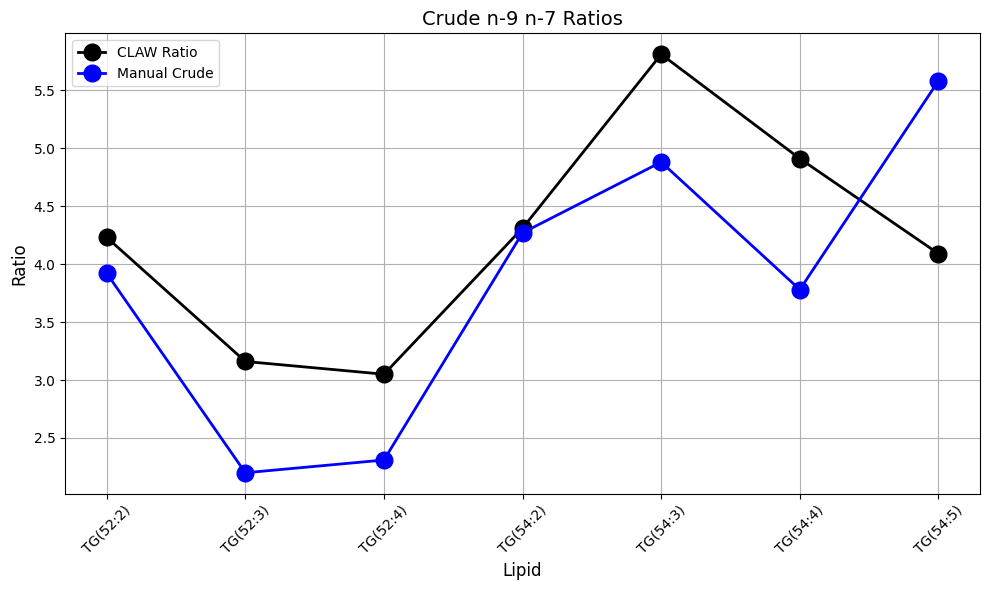

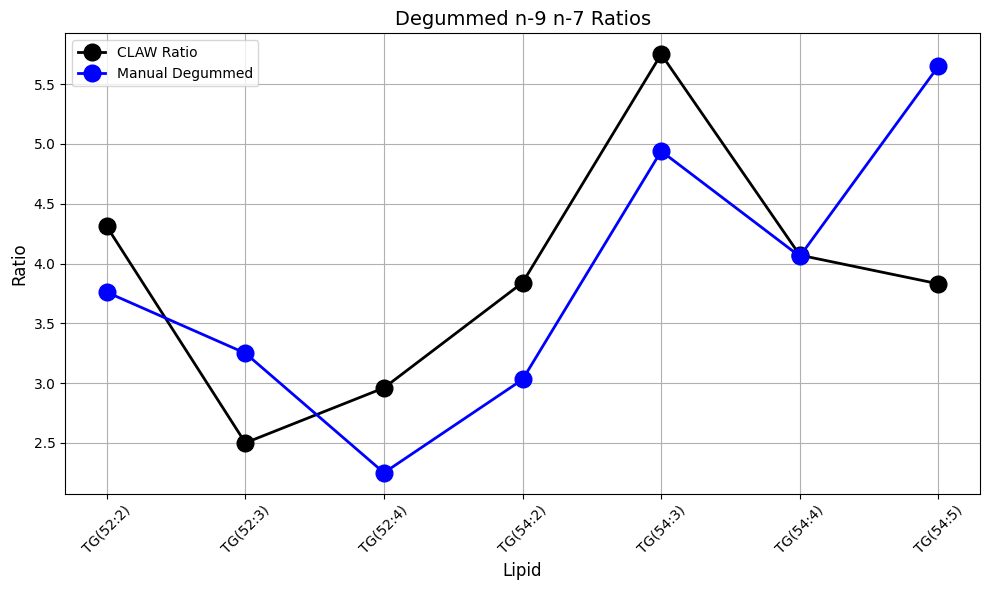

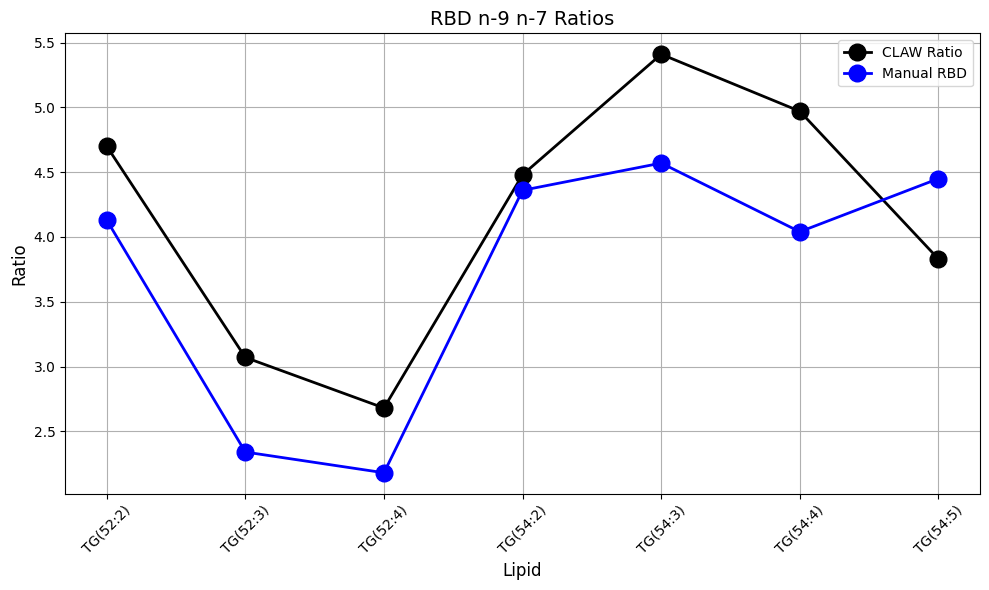

In [34]:
# Import the function from your Python file
from plot import plot_ratio_comparison

# Assuming df_sample1_ratio, df_sample2_ratio, and df_sample3_ratio are already loaded

# Plotting Crude comparison
plot_ratio_comparison(df_sample1_ratio, 'Crude', 'Crude')

# Plotting Degummed comparison
plot_ratio_comparison(df_sample2_ratio, 'Degummed', 'Degummed')

# Plotting RBD comparison
plot_ratio_comparison(df_sample3_ratio, 'RBD', 'RBD')


### Lipidomic OzESI Data Visualization

This section presents the visual representation of the lipidomic OzESI data, focusing on the ratio analysis of isomeric lipids based on their double bond location. By default, the visualization emphasizes the n-9/n-7 ratios, but the configuration can be tailored to accommodate any specific double bond location on a lipid. Select the directory where the plots will be saved.

In [35]:
from plot import process_and_plot

# Define output directories for each sample
project = 'Projects/canola/'
plot_folder = 'plots/'

output_directory_crude = os.path.join(project, plot_folder, 'crude')
output_directory_degummed = os.path.join(project, plot_folder, 'degummed')
output_directory_rbd = os.path.join(project, plot_folder, 'rbd')

# Assuming df_sample1_ratio, df_sample2_ratio, and df_sample3_ratio are already loaded

# Process and plot for each sample
process_and_plot(df_sample1_ratio, 'Crude', output_directory_crude)
process_and_plot(df_sample2_ratio, 'Degummed', output_directory_degummed)
process_and_plot(df_sample3_ratio, 'RBD', output_directory_rbd)


# Ratio Plot for Paper

In [36]:
from plot import plot_canola_comparison

# Assuming df_sample1_ratio, df_sample2_ratio, and df_sample3_ratio are already loaded

# Plot and display the comparison
plot_canola_comparison(df_sample1_ratio, df_sample2_ratio, df_sample3_ratio)

# Alternatively, save the plot to a file
# plot_canola_comparison(df_sample1_ratio, df_sample2_ratio, df_sample3_ratio, output_file="canola_comparison.png")
